## Exercícios de Pesquisa Operacional

Exercícios criados projetados para testar competências essenciais, tais como:
* Otimização linear;
* Tomada de decisão em cenários reais; e
* Estratégias práticas de logística e gestão.

### Prepara o ambiente de execução

In [ ]:
!pip install pulp | tail -1
!pip install pandas | tail -1
!pip install numpy | tail -1

import pulp
import pandas as pd
import numpy as np

### Exercício 4: Otimização Multimodal

Uma empresa usa três modais (rodoviário, aéreo e ferroviário) para atender a quatro cidades diferentes. Cada modal tem um custo e capacidade por cidade conforme a tabela abaixo:

| Modal | Capacidade | Cidade A | Cidade B | Cidade C | Cidade D |
|---:|:---:|:---:|:---:|:---:|:---:|
| Rodoviário  | 500 | 12 | 15 | 14 | 13 |
| Aéreo       | 300 | 20 | 22 | 18 | 21 |
| Ferroviário | 400 | 10 | 12 | 11 |  9 |

* *Custo em R\$/un e Capacidade em un*

---
A demanda das cidades A, B, C e D é respectivamente 250, 350, 300 e 200 unidades.

1. Formule o modelo matemático para minimizar os custos totais de transporte respeitando a capacidade dos modais e atendendo integralmente a demanda.

#### Resolução

Para resolver devemos entender a estrutura do problema:
* Todas as demandas das cidades devem ser atendidas;
* Deve ser respeitada a capacidade de cada modal; e
* O objetivo é minimizar os custos.

A variável *i* irá representar o modal (Rodoviário, Aéreo ou Ferroviário).
A variável *j* irá representar a cidade (A, B, C ou D)

Desta forma x$_{ij}$ representa a quantidade enviada pelo modal *i* para a cidade *j*.

In [ ]:
# Dados do problema
modais = ['Rodoviário', 'Aéreo', 'Ferroviário']

cidades = ['Cidade A', 'Cidade B', 'Cidade C', 'Cidade D']

capacidade = {'Rodoviário': 500, 'Aéreo': 300, 'Ferroviário': 400}

custos = {
    'Rodoviário': [12, 15, 14, 13],
    'Aéreo': [20, 22, 18, 21],
    'Ferroviário': [10, 12, 11, 9]
}

demanda = {'Cidade A': 250, 'Cidade B': 350, 'Cidade C': 300, 'Cidade D': 200}

# Define a variáveis de decisão Xij
x = pulp.LpVariable.dicts("x", ((i, j) for i in modais for j in cidades), lowBound=0, cat='Continuous')

Define a Função objetivo:

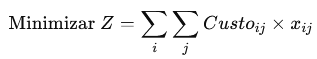

In [ ]:
# Modelo de otimização
modelo = pulp.LpProblem("Otimizacao_Mulcatimodal", pulp.LpMinimize)

# Função objetivo
modelo += pulp.lpSum(custos[i][cidades.index(j)] * x[(i, j)] for i in modais for j in cidades)

Define as restrições ao modelo:
1. Restrição de Capacidade

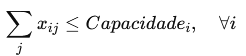

2. Atendimentos às demandas das cidades:


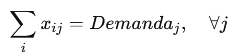

In [ ]:
# Restrições de capacidade
for i in modais:
    modelo += pulp.lpSum(x[(i, j)] for j in cidades) <= capacidade[i]

# Restrições de demanda
for j in cidades:
    modelo += pulp.lpSum(x[(i, j)] for i in modais) == demanda[j]

# compila e resolve o problema
modelo.solve()

# Resultado
resultado = [(i, j, pulp.value(x[(i, j)])) for i in modais for j in cidades if pulp.value(x[(i, j)]) > 0]

df_cidade_modal = pd.DataFrame(resultado, columns=['Cidade', 'Modal', 'Quantidade'])

print(df_cidade_modal)
print(f"\nCusto total: R$ {pulp.value(modelo.objective):.0f}")

        Cidade     Modal  Quantidade
0   Rodoviário  Cidade A       250.0
1   Rodoviário  Cidade B       250.0
2        Aéreo  Cidade C       200.0
3  Ferroviário  Cidade B       100.0
4  Ferroviário  Cidade C       100.0
5  Ferroviário  Cidade D       200.0

Custo total: R$ 14450
